In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
PATHS = ["log/herd01_3_hour_1/", "log/herd01_3_hour/", "log/herd01_3_hour_2/",
         "log/herd01_3_hour_5/"]

In [28]:
def get_delays_and_profits(paths):
    output = None
    for path in paths:
        master_profit = None
        delays = {}
        for file in os.listdir(path):
            if 'HerdMasterAgent' in file:
                try:
                    df = pd.read_pickle(os.path.join(path,file), compression='bz2')
                    master_profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]
                except (IndexError, KeyError):
                    continue                
            if 'HerdSlaveAgent' in file:
                try:
                    df = pd.read_pickle(os.path.join(path,file), compression='bz2')
                    delay = df.loc[df.EventType == 'DELAY', 'Event'].values[0]
                    delay = pd.Timedelta(delay, unit='ns')
                    profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]
                    delays[delay] = profit
                except (IndexError, KeyError):
                    continue
        x, y = np.asarray(sorted(delays.items()))[:, 0], np.asarray(sorted(delays.items()))[:, 1]
        temp = pd.DataFrame({'DELAY': x, 'SLAVE_PROFIT': y})
        temp['MASTER_PROFIT'] = master_profit
        temp['SIMULATION'] = path
        if output is None:
            output = temp
        else:
            output = output.append(temp)
    return output

In [45]:
df = get_delays_and_profits(PATHS)
len(df)

120

In [46]:
df['PERCENT'] = df.SLAVE_PROFIT/df.MASTER_PROFIT

In [34]:
df = df[df.MASTER_PROFIT > 0]

In [48]:
df = df.sort_values(by='DELAY').reset_index(drop=True)

In [50]:
df.head(50)

,DELAY,SLAVE_PROFIT,MASTER_PROFIT,SIMULATION,PERCENT
0,0 days 00:00:00.000171947,696443,2729307,log/herd01_3_hour_5/,0.255172
1,0 days 00:00:00.000187140,86826,2729307,log/herd01_3_hour_5/,0.0318125
2,0 days 00:00:00.000202625,511409,2729307,log/herd01_3_hour_5/,0.187377
3,0 days 00:00:00.000524534,208830,2729307,log/herd01_3_hour_5/,0.0765139
4,0 days 00:00:00.000573471,210780,2729307,log/herd01_3_hour_5/,0.0772284
5,0 days 00:00:00.000768544,9586,2729307,log/herd01_3_hour_5/,0.00351225
6,0 days 00:00:00.002205210,118712,2729307,log/herd01_3_hour_5/,0.0434953
7,0 days 00:00:00.002321237,490899,2729307,log/herd01_3_hour_5/,0.179862
8,0 days 00:00:00.002503564,13497,2729307,log/herd01_3_hour_5/,0.00494521
9,0 days 00:00:00.003567,240558,2729307,log/herd01_3_hour_5/,0.0881389


In [40]:
df['g'] = df.index//6
df

,DELAY,SLAVE_PROFIT,MASTER_PROFIT,SIMULATION,PERCENT,g
0,0 days 00:00:00.000171947,696443,2729307,log/herd01_3_hour_5/,0.255172,0
1,0 days 00:00:00.000187140,86826,2729307,log/herd01_3_hour_5/,0.0318125,0
2,0 days 00:00:00.000202625,511409,2729307,log/herd01_3_hour_5/,0.187377,0
3,0 days 00:00:00.000524534,208830,2729307,log/herd01_3_hour_5/,0.0765139,0
4,0 days 00:00:00.000573471,210780,2729307,log/herd01_3_hour_5/,0.0772284,0
...,...,...,...,...,...,...
85,0 days 00:00:00.954411362,23486,2041205,log/herd01_3_hour/,0.0115059,14
86,0 days 00:00:00.967907712,15936,2041205,log/herd01_3_hour/,0.00780715,14
87,0 days 00:00:00.972446279,12149,219907,log/herd01_3_hour_1/,0.0552461,14
88,0 days 00:00:00.972946662,-783,219907,log/herd01_3_hour_1/,-0.0035606,14


In [43]:
df

,DELAY,SLAVE_PROFIT,MASTER_PROFIT,SIMULATION,PERCENT,g
0,0 days 00:00:00.000171947,696443,2729307,log/herd01_3_hour_5/,0.255172,0
1,0 days 00:00:00.000187140,86826,2729307,log/herd01_3_hour_5/,0.0318125,0
2,0 days 00:00:00.000202625,511409,2729307,log/herd01_3_hour_5/,0.187377,0
3,0 days 00:00:00.000524534,208830,2729307,log/herd01_3_hour_5/,0.0765139,0
4,0 days 00:00:00.000573471,210780,2729307,log/herd01_3_hour_5/,0.0772284,0
...,...,...,...,...,...,...
85,0 days 00:00:00.954411362,23486,2041205,log/herd01_3_hour/,0.0115059,14
86,0 days 00:00:00.967907712,15936,2041205,log/herd01_3_hour/,0.00780715,14
87,0 days 00:00:00.972446279,12149,219907,log/herd01_3_hour_1/,0.0552461,14
88,0 days 00:00:00.972946662,-783,219907,log/herd01_3_hour_1/,-0.0035606,14


In [44]:
temp = df.groupby('g').agg('mean')
temp

,MASTER_PROFIT
g,
0,2.729307e+06
1,2.729307e+06
2,2.729307e+06
3,2.729307e+06
4,2.614623e+06
5,1.245240e+06
6,1.434106e+06
7,1.130556e+06
8,8.270063e+05


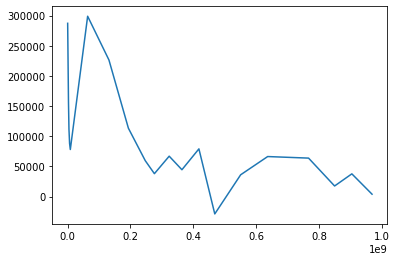

In [10]:
plt.plot(temp.x, temp.y)

In [13]:
x = np.insert(x, 0, 0)

In [7]:
df = pd.read_pickle(os.path.join(PATH,'HerdMasterAgent5153.bz2'), compression='bz2')
df

,EventType,Event
EventTime,,
NaT,AGENT_TYPE,HerdMasterAgent
NaT,WAKE_FREQUENCY,1e+09
NaT,STARTING_CASH,10000000
2020-06-03 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2020-06-03 09:30:00.014094476,BID_DEPTH,"[(99970, 15174)]"
...,...,...
2020-06-03 12:29:59.105854044,FINAL_CASH_POSITION,1945965660
2020-06-03 12:29:59.105854044,MARK_TO_MARKET,-19365 ABM @ 99867 == -1933924455
2020-06-03 12:29:59.105854044,MARKED_TO_MARKET,12041205


In [18]:
master_profit = df.loc[df.EventType == 'ENDING_CASH', 'Event'].values[0] - df.loc[df.EventType == 'STARTING_CASH', 'Event'].values[0]

In [19]:
y = np.insert(y, 0, master_profit)

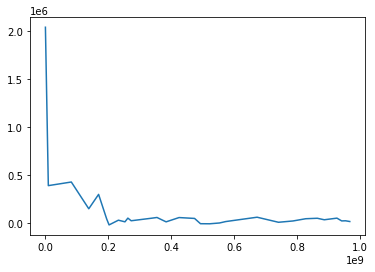

In [20]:
# python -u abides.py -c herd01 -t ABM -d 20200603 -s 1234 -l herd01_2_hour --end-time 11:30:00 --master-window 1e+9
plt.plot(x, y)